Monte Carlo Risk Predictor(Single Asset Portfolio)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('Data.csv')

In [ ]:
df

,Date,Adj Close,Returns
0,02-07-2002,16.77,0.009413
1,03-07-2002,16.92,0.010241
2,04-07-2002,17.10,0.046367
3,05-07-2002,17.91,0.018370
4,08-07-2002,18.24,-0.008031
...,...,...,...
5427,14-05-2024,2866.15,-0.018469
5428,15-05-2024,2813.70,0.000124
5429,16-05-2024,2814.05,-0.001476
5430,17-05-2024,2809.90,0.002293


In [ ]:
df.drop(["Date","Adj Close"],axis=1,inplace=True)
df

,Returns
0,0.009413
1,0.010241
2,0.046367
3,0.018370
4,-0.008031
...,...
5427,-0.018469
5428,0.000124
5429,-0.001476
5430,0.002293


In [ ]:
df.describe()

,Returns
count,5431.000000
mean,0.000943
std,0.016622
min,-0.151148
25%,-0.007345
50%,0.000371
75%,0.009172
max,0.092202


In [ ]:
mn = df["Returns"].mean()
std = df["Returns"].std()
print(mn)
print(std)

0.0009434540998342846
0.01662215557307443


In [ ]:
arr = np.array(df["Returns"])
arr
arr.shape
arr.sort()
arr
arr = np.delete(arr,0)
arr
def remove_nan(arr):
    return arr[~np.isnan(arr)]
arr = remove_nan(arr)
arr

array([-0.13882828, -0.12022105, -0.0958841 , ...,  0.08730511,
        0.08883095,  0.09220196])

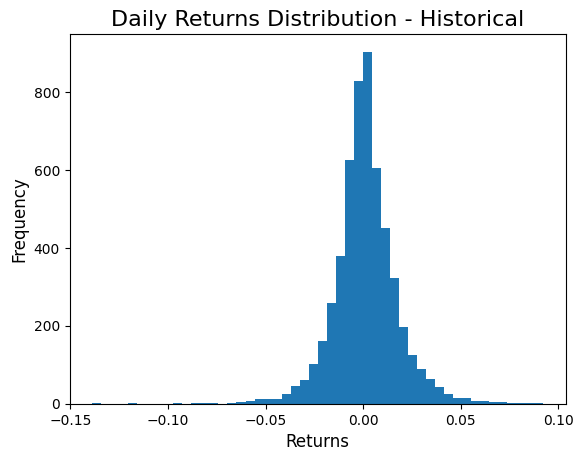

In [ ]:
plt.hist(arr,bins=50)
plt.xlabel("Returns",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.title("Daily Returns Distribution - Historical", fontsize = 16)
plt.show()

In [ ]:
monte_carlo_st = np.random.normal(mn,std,10000)
monte_carlo_st

array([-2.13340949e-03,  2.98645954e-05, -4.33772830e-04, ...,
        5.99410895e-03,  5.85935668e-04, -2.89817835e-03])

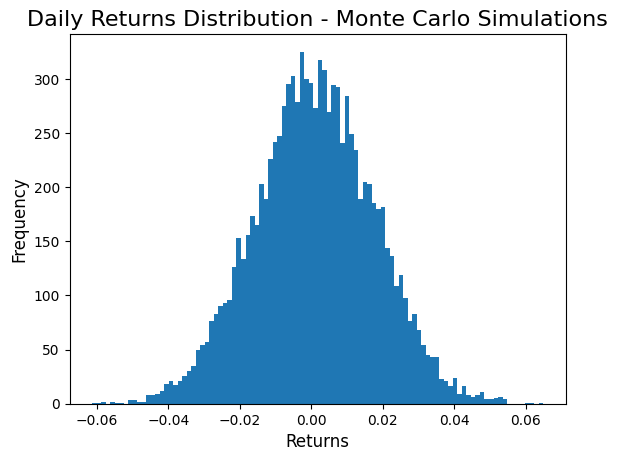

In [ ]:
plt.hist(monte_carlo_st,bins=100)
plt.xlabel("Returns",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)
plt.title("Daily Returns Distribution - Monte Carlo Simulations", fontsize = 16)
plt.show()

In [ ]:
mean = np.mean(monte_carlo_st)
stdev = np.std(monte_carlo_st)
print(mean)
print(stdev)

0.000984669376108065
0.016669096559396527


In [ ]:
monte_carlo_st
monte_carlo_st.shape
monte_carlo_st.sort()
monte_carlo_st
monte_carlo_st.shape

(10000,)

In [ ]:
def VaR(arr):
  arr2 = [0]*5
  arr2[0] = np.percentile(arr,10)
  arr2[1] = np.percentile(arr,5)
  arr2[2] = np.percentile(arr,2.5)
  arr2[3] = np.percentile(arr,1)
  arr2[4] = np.percentile(arr,0.5)
  print(arr2)
  return arr2

In [ ]:
hist_VaR_per = VaR(arr)

[-0.0169224246, -0.0243364112, -0.032191370525000006, -0.04355951641, -0.053205355669999996]


In [ ]:
monte_VaR_per = VaR(monte_carlo_st)

[-0.02053167085477243, -0.02672664710836147, -0.03146546888264279, -0.03799850670504568, -0.04151047315939488]


In [ ]:
hist_loss = [0]*5
cmp = 2816.35           # Current Market Price of Asian Paints(18th May,2024)
mc_loss = [0]*5
for i in range(5):
  hist_loss[i] = (cmp*hist_VaR_per[i])
  mc_loss[i] = (cmp*monte_VaR_per[i])
print(hist_loss)
print(mc_loss)

[-47.65947052221, -68.53985168312, -90.66216637808377, -122.67884404130349, -149.84490344120448]
[-57.824371211838326, -75.27159258363382, -88.61777328763101, -107.0170943587554, -116.90802108246176]


In [ ]:
Stock_price_hist = [0]*5
for i in range(5):
  Stock_price_hist[i] = (cmp + hist_loss[i])
print(Stock_price_hist)
Stock_price_mc = [0]*5
for i in range(5):
  Stock_price_mc[i] = (cmp + mc_loss[i])
print(Stock_price_mc)

[2768.69052947779, 2747.81014831688, 2725.687833621916, 2693.6711559586965, 2666.5050965587952]
[2758.5256287881616, 2741.078407416366, 2727.732226712369, 2709.3329056412445, 2699.441978917538]


In [ ]:
cols = ["Percentile","Confidence Level", "VaR(%)", "VaR(INR)","Stock Price(INR)"]
data = {
    "Percentile": ["10%","5%","2.5%","1%","0.5%"],
    "Confidence Level": ["90%","95%","97.5%","99%","99.5%"],
    "VaR(%)": hist_VaR_per,
    "VaR(INR)": hist_loss,
    "Stock Price(INR)": Stock_price_hist
}
print("Value at Risk - Historical")
df_hist = pd.DataFrame(data)
df_hist

Value at Risk - Historical


,Percentile,Confidence Level,VaR(%),VaR(INR),Stock Price(INR)
0,10%,90%,-0.016922,-47.659471,2768.690529
1,5%,95%,-0.024336,-68.539852,2747.810148
2,2.5%,97.5%,-0.032191,-90.662166,2725.687834
3,1%,99%,-0.043560,-122.678844,2693.671156
4,0.5%,99.5%,-0.053205,-149.844903,2666.505097


In [ ]:
cols = ["Percentile","Confidence Level", "VaR(%)", "VaR(INR)","Stock Price(INR)"]
data = {
    "Percentile": ["10%","5%","2.5%","1%","0.5%"],
    "Confidence Level": ["90%","95%","97.5%","99%","99.5%"],
    "VaR(%)": monte_VaR_per,
    "VaR(INR)": mc_loss,
    "Stock Price(INR)": Stock_price_mc
}
print("Value at Risk - Monte Carlo Simulations")
df_mc = pd.DataFrame(data)
df_mc

Value at Risk - Monte Carlo Simulations


,Percentile,Confidence Level,VaR(%),VaR(INR),Stock Price(INR)
0,10%,90%,-0.020532,-57.824371,2758.525629
1,5%,95%,-0.026727,-75.271593,2741.078407
2,2.5%,97.5%,-0.031465,-88.617773,2727.732227
3,1%,99%,-0.037999,-107.017094,2709.332906
4,0.5%,99.5%,-0.041510,-116.908021,2699.441979


In [ ]:
from scipy import stats

In [ ]:
print(mean)
print(stdev)
print(stats.norm.ppf(0.95))

0.000984669376108065
0.016669096559396527
1.6448536269514722


In [ ]:
Para_VaR_per = [0]*5
per = [0.10,0.05,0.025,0.01,0.005]
for i in range(5):
  Para_VaR_per[i] = mean + stdev*stats.norm.ppf(per[i])
print(Para_VaR_per)

[-0.020377637415800665, -0.02643355455761963, -0.03168615953512967, -0.037793447967025544, -0.041952078005271676]


In [ ]:
Para_loss = [0]*5
cmp = 2816.35           # Current Market Price of Asian Paints(18th May,2024)
for i in range(5):
  Para_loss[i] = (cmp*hist_VaR_per[i])
print(Para_loss)

[-47.65947052221, -68.53985168312, -90.66216637808377, -122.67884404130349, -149.84490344120448]


In [ ]:
Stock_price_Para = [0]*5
for i in range(5):
  Stock_price_Para[i] = (cmp + Para_loss[i])
print(Stock_price_Para)

[2768.69052947779, 2747.81014831688, 2725.687833621916, 2693.6711559586965, 2666.5050965587952]


In [ ]:
cols = ["Percentile","Confidence Level", "VaR(%)", "VaR(INR)","Stock Price(INR)"]
data = {
    "Percentile": ["10%","5%","2.5%","1%","0.5%"],
    "Confidence Level": ["90%","95%","97.5%","99%","99.5%"],
    "VaR(%)": Para_VaR_per,
    "VaR(INR)": Para_loss,
    "Stock Price(INR)": Stock_price_Para
}
print("Value at Risk - Parametric Method")
df_Para = pd.DataFrame(data)
df_Para

Value at Risk - Parametric Method


,Percentile,Confidence Level,VaR(%),VaR(INR),Stock Price(INR)
0,10%,90%,-0.020378,-47.659471,2768.690529
1,5%,95%,-0.026434,-68.539852,2747.810148
2,2.5%,97.5%,-0.031686,-90.662166,2725.687834
3,1%,99%,-0.037793,-122.678844,2693.671156
4,0.5%,99.5%,-0.041952,-149.844903,2666.505097
